<a href="https://colab.research.google.com/github/smlra-kjsce/ML-101-2021/blob/master/Naive-Bayes/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***`Gaussian Naive-Bayes Algorithm.`***

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Naive-Bayes-Classification-Data.csv")

In [ ]:
x=df.drop('diabetes', axis=1)
y=df['diabetes']
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=1)


In [ ]:
model= GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred= model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1])

In [ ]:
accuracy= accuracy_score(y_test,y_pred)*100
accuracy

94.37751004016064

***Multinomial Naive Bayes Algorithm***

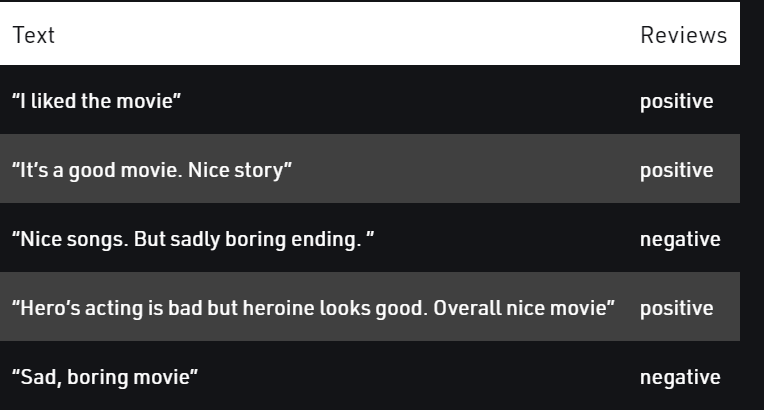

We classify whether the text “overall liked the movie” has a positive 
review or a negative review. 
```
We have to calculate, 
P(positive | overall liked the movie) — the probability that the tag of a sentence is positive given that the sentence is “overall liked the movie”. 
P(negative | overall liked the movie) — the probability that the tag of a sentence is negative given that the sentence is “overall liked the movie”.
Before that, first, we apply Removing Stopwords and Stemming in the text.
Removing Stopwords: These are common words that don’t really add anything to the classification, such as an able, either, else, ever and so on.
Stemming: Stemming to take out the root of the word.




Feature Engineering: We need to convert this text into numbers that we can do calculations on. We use word frequencies. 
In our case, we have P(positive | overall liked the movie), by using this theorem:
 

`P(positive | overall liked the movie) = P(overall liked the movie | positive) * P(positive) / P(overall liked the movie)`

First, we calculate the a priori probability of each tag: for a given sentence in our training data, the probability that it is positive P(positive) is 3/5. Then, P(negative) is 2/5.
Then, calculating P(overall | positive) means counting how many times the word “overall” appears in positive texts (1) divided by the total number of words in positive (17). Therefore, P(overall | positive) = 1/17, P(liked/positive) = 1/17, P(the/positive) = 2/17, P(movie/positive) = 3/17. 
If probability comes out to be zero then By using Laplace smoothing: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1. In our case, the total possible words count are 21.

P(overall | positive) * P(liked | positive) * P(the | positive) * P(movie | positive) * P(positive ) = 1.38 * 10^{-5} = 0.0000138
P(overall | negative) * P(liked | negative) * P(the | negative) * P(movie | negative) * P(negative) = 0.13 * 10^{-5} = 0.0000013

Hence we give "overall liked the movie" as positive

In [ ]:
import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
  
dataset = [["I liked the movie", "positive"], 
           ["It’s a good movie. Nice story", "positive"], 
           ["Hero’s acting is bad but heroine looks good Overall nice movie", "positive"], 
            ["Nice songs. But sadly boring ending.", "negative"], 
            ["sad movie, boring movie", "negative"],
          ] 
              
dataset = pd.DataFrame(dataset) 
dataset.columns = ["Text", "Reviews"] 
  
#nltk.download('stopwords') 
  
corpus = [] 
  
for i in range(0, 5):  #perform basic data preprocessing
    text = re.sub('[^a-zA-Z]', '', dataset['Text'][i]) 
    
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer() 
    text = ''.join(text) 
    corpus.append(text) 
  
cv = CountVectorizer(max_features = 1500) #used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
  
X = cv.fit_transform(corpus).toarray() 
y = dataset.iloc[:, 1].values 
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.31) 

from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import MultinomialNB
  
classifier = MultinomialNB(); 
classifier.fit(X_train, y_train) 
  
y_pred = classifier.predict(X_test) 

  
cm = confusion_matrix(y_test, y_pred) 
cm 


array([[0, 1],
       [0, 1]])

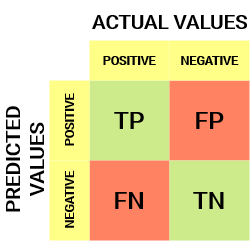

Bernoulli Naive Bayes Theorem:

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:

X = np.random.randint(2, size=(500,10)) #X will have training data with 500 instances with 10 features each, having values in the form of 0 and 1 only.
Y = np.random.randint(2, size=(500, 1))

X_test = X[:50, :10]
y_test = Y[:50, :1]

In [ ]:
clf = BernoulliNB()

model = clf.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred =clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.66
